### Importación de datos



In [22]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [23]:
ingreso_tienda1 = tienda1['Precio'].sum()
print(f"Ingreso total tienda 1 = ${ingreso_tienda1:,.2f}")

Ingreso total tienda 1 = $1,150,880,400.00


In [24]:
ingreso_tienda2 = tienda2['Precio'].sum()
print(f"Ingreso total tienda 2 = ${ingreso_tienda2:,.2f}")

Ingreso total tienda 2 = $1,116,343,500.00


In [25]:
ingreso_tienda3 = tienda3['Precio'].sum()
print(f"Ingreso total tienda 3 = ${ingreso_tienda3:,.2f}")

Ingreso total tienda 3 = $1,098,019,600.00


In [26]:
ingreso_tienda4 = tienda4['Precio'].sum()
print(f"Ingreso total tienda 4 = ${ingreso_tienda4:,.2f}")

Ingreso total tienda 4 = $1,038,375,700.00


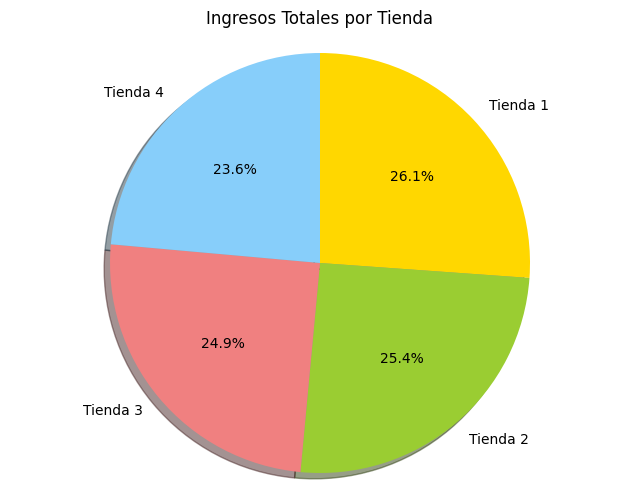

In [27]:
import matplotlib.pyplot as plt

# Datos de ingresos de las tiendas
ingreso_tienda1 = tienda1['Precio'].sum()
ingreso_tienda2 = tienda2['Precio'].sum()
ingreso_tienda3 = tienda3['Precio'].sum()
ingreso_tienda4 = tienda4['Precio'].sum()

# Etiquetas para cada porción del gráfico
labels = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Tamaños de cada porción
sizes = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]

# Colores para cada porción (opcional)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))  # Ajustar el tamaño del gráfico
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90, counterclock=False)

# Añadir un título
plt.title('Ingresos Totales por Tienda')

# Asegurar que el gráfico sea un círculo
plt.axis('equal')

# Mostrar el gráfico
plt.show()

# 2. Ventas por categoría

In [28]:
ventas_por_categoria_tienda1 = tienda1.groupby('Categoría del Producto').size()
print("Ventas por categoría tienda 1: \n", ventas_por_categoria_tienda1)


Ventas por categoría tienda 1: 
 Categoría del Producto
Artículos para el hogar    171
Deportes y diversión       284
Electrodomésticos          312
Electrónicos               448
Instrumentos musicales     182
Juguetes                   324
Libros                     173
Muebles                    465
dtype: int64


In [29]:
ventas_por_categoria_tienda2 = tienda2.groupby('Categoría del Producto').size()
print("Ventas por categoría tienda 2: \n", ventas_por_categoria_tienda2)

Ventas por categoría tienda 2: 
 Categoría del Producto
Artículos para el hogar    181
Deportes y diversión       275
Electrodomésticos          305
Electrónicos               422
Instrumentos musicales     224
Juguetes                   313
Libros                     197
Muebles                    442
dtype: int64


In [30]:
ventas_por_categoria_tienda3 = tienda3.groupby('Categoría del Producto').size()
print("Ventas por categoría tienda 3: \n", ventas_por_categoria_tienda3)

Ventas por categoría tienda 3: 
 Categoría del Producto
Artículos para el hogar    177
Deportes y diversión       277
Electrodomésticos          278
Electrónicos               451
Instrumentos musicales     177
Juguetes                   315
Libros                     185
Muebles                    499
dtype: int64


In [31]:
ventas_por_categoria_tienda4 = tienda4.groupby('Categoría del Producto').size()
print("Ventas por categoría tienda 4: \n", ventas_por_categoria_tienda4)

Ventas por categoría tienda 4: 
 Categoría del Producto
Artículos para el hogar    201
Deportes y diversión       277
Electrodomésticos          254
Electrónicos               451
Instrumentos musicales     170
Juguetes                   338
Libros                     187
Muebles                    480
dtype: int64


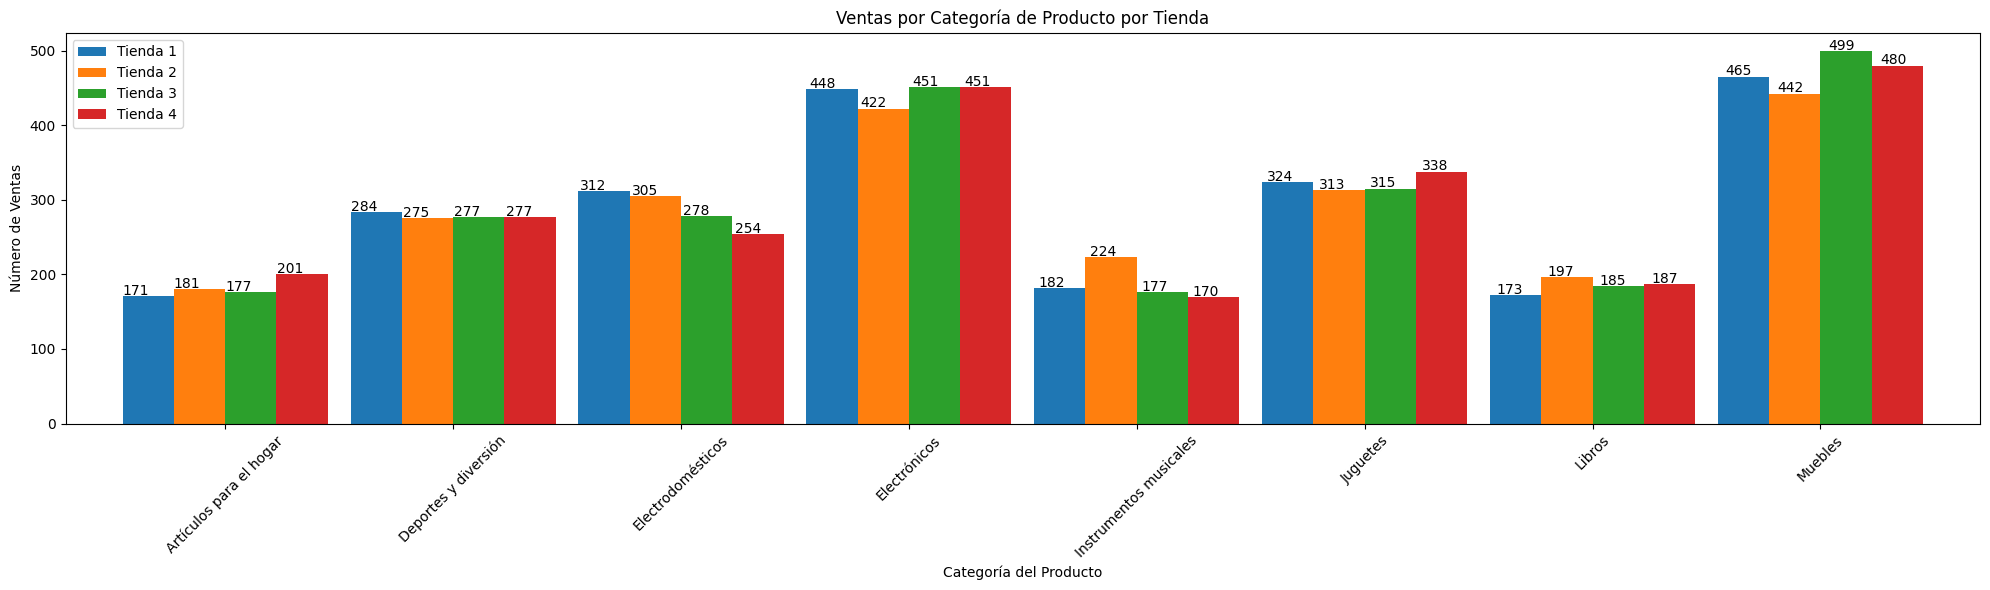

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({
    'Tienda 1': ventas_por_categoria_tienda1,
    'Tienda 2': ventas_por_categoria_tienda2,
    'Tienda 3': ventas_por_categoria_tienda3,
    'Tienda 4': ventas_por_categoria_tienda4
})


ax= df.plot(kind='bar', figsize=(20, 6), width=0.9)
plt.title('Ventas por Categoría de Producto por Tienda')
plt.xlabel('Categoría del Producto')
plt.ylabel('Número de Ventas')
plt.xticks(rotation=45)
plt.tight_layout()

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


plt.show()

# 3. Calificación promedio de la tienda


In [33]:
tiendas = {'Tienda 1': tienda1, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}

for nombre_tienda, tienda in tiendas.items():
    calificacion_promedio = tienda['Calificación'].mean()
    print(f"Calificación promedio de {nombre_tienda}: {calificacion_promedio:.2f}")

Calificación promedio de Tienda 1: 3.98
Calificación promedio de Tienda 2: 4.04
Calificación promedio de Tienda 3: 4.05
Calificación promedio de Tienda 4: 4.00


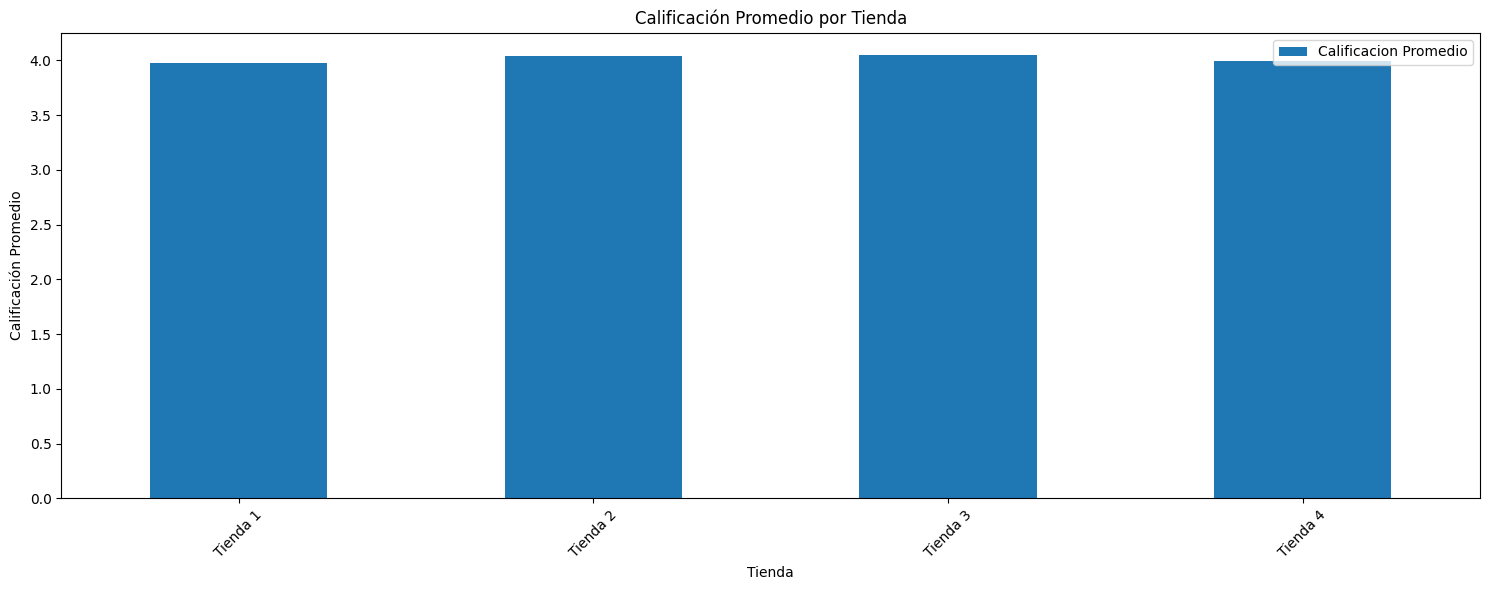

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

tien_das = {'Tienda 1': tienda1, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}

# Diccionario para almacenar las calificaciones promedio de cada tienda
calificaciones_promedio = {}

for nombre_tienda, tienda in tien_das.items():
    calificaciones_promedio[nombre_tienda] = tienda['Calificación'].mean()

# Crear un DataFrame a partir del diccionario
df_calificaciones = pd.DataFrame.from_dict(calificaciones_promedio, orient='index', columns=['Calificacion Promedio'])

# Crear el gráfico de barras
df_calificaciones.plot(kind='bar', figsize=(15, 6), width=0.5)
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [35]:
ventas_por_producto_tienda1 = tienda1.groupby('Producto').size()

productos_mas_vendidos_tienda1 = ventas_por_producto_tienda1.sort_values(ascending=False).head(5)
print("Top 5 productos más vendidos en la tienda 1:\n", productos_mas_vendidos_tienda1)

productos_menos_vendidos_tienda1 = ventas_por_producto_tienda1.sort_values(ascending=True).head(5)
print("Top 5 productos menos vendidos en la tienda 1:\n", productos_menos_vendidos_tienda1)

Top 5 productos más vendidos en la tienda 1:
 Producto
Armario             60
TV LED UHD 4K       60
Microondas          60
Secadora de ropa    58
Mesa de noche       56
dtype: int64
Top 5 productos menos vendidos en la tienda 1:
 Producto
Auriculares con micrófono      33
Celular ABXY                   33
Olla de presión                35
Pandereta                      36
Ciencia de datos con Python    39
dtype: int64


In [36]:
ventas_por_producto_tienda2 = tienda2.groupby('Producto').size()

productos_mas_vendidos_tienda2 = ventas_por_producto_tienda2.sort_values(ascending=False).head(5)
print("Top 5 productos más vendidos en la tienda 2:\n", productos_mas_vendidos_tienda2)

productos_menos_vendidos_tienda2 = ventas_por_producto_tienda2.sort_values(ascending=True).head(5)
print("Top 5 productos menos vendidos en la tienda 2:\n", productos_menos_vendidos_tienda2)

Top 5 productos más vendidos en la tienda 2:
 Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Pandereta                    58
Guitarra acústica            58
dtype: int64
Top 5 productos menos vendidos en la tienda 2:
 Producto
Juego de mesa      32
Impresora          34
Mesa de comedor    34
Sillón             35
Auriculares        37
dtype: int64


In [37]:
ventas_por_producto_tienda3 = tienda3.groupby('Producto').size()

productos_mas_vendidos_tienda3 = ventas_por_producto_tienda3.sort_values(ascending=False).head(5)
print("Top 5 productos más vendidos en la tienda 3:\n", productos_mas_vendidos_tienda3)

productos_menos_vendidos_tienda3 = ventas_por_producto_tienda3.sort_values(ascending=True).head(5)
print("Top 5 productos menos vendidos en la tienda 3:\n", productos_menos_vendidos_tienda3)

Top 5 productos más vendidos en la tienda 3:
 Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
dtype: int64
Top 5 productos menos vendidos en la tienda 3:
 Producto
Bloques de construcción    35
Set de vasos               36
Mochila                    36
Microondas                 36
Vaso térmico               38
dtype: int64


In [40]:
ventas_por_producto_tienda4 = tienda4.groupby('Producto').size()

productos_mas_vendidos_tienda4 = ventas_por_producto_tienda4.sort_values(ascending=False).head(5)
print("Top 5 productos más vendidos en la tienda 4:\n", productos_mas_vendidos_tienda4)

productos_menos_vendidos_tienda4 = ventas_por_producto_tienda4.sort_values(ascending=True).head(5)
print("Top 5 productos menos vendidos en la tienda 4:\n", productos_menos_vendidos_tienda4)


Top 5 productos más vendidos en la tienda 4:
 Producto
Cama box                     62
Cubertería                   59
Cama king                    56
Dashboards con Power BI      56
Carrito de control remoto    55
dtype: int64
Top 5 productos menos vendidos en la tienda 4:
 Producto
Guitarra eléctrica             33
Armario                        34
Guitarra acústica              37
Ciencia de datos con Python    38
Lavadora de ropa               38
dtype: int64


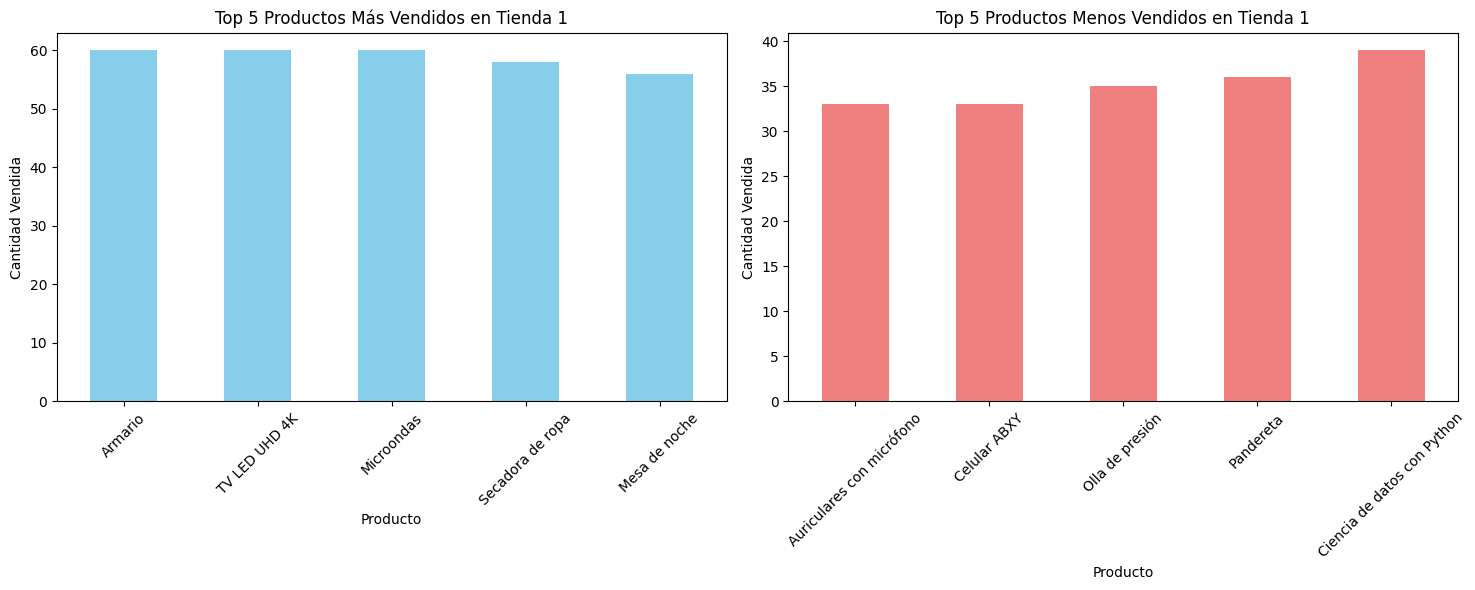

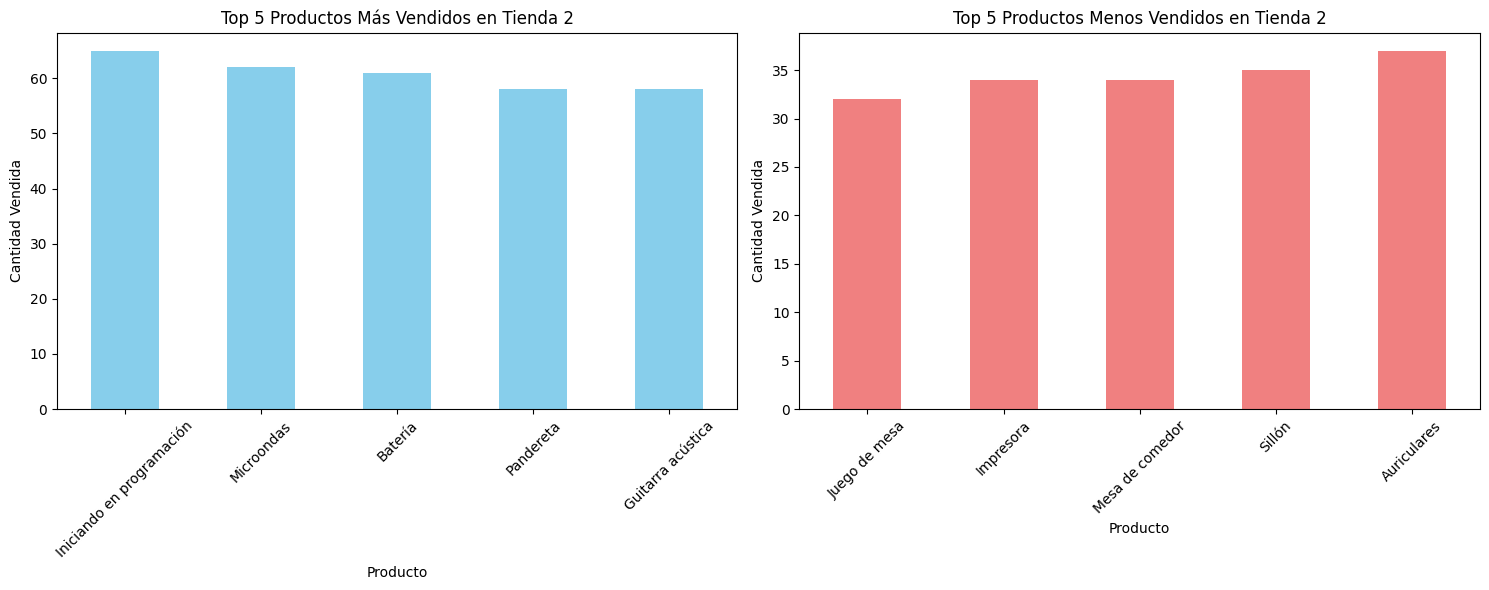

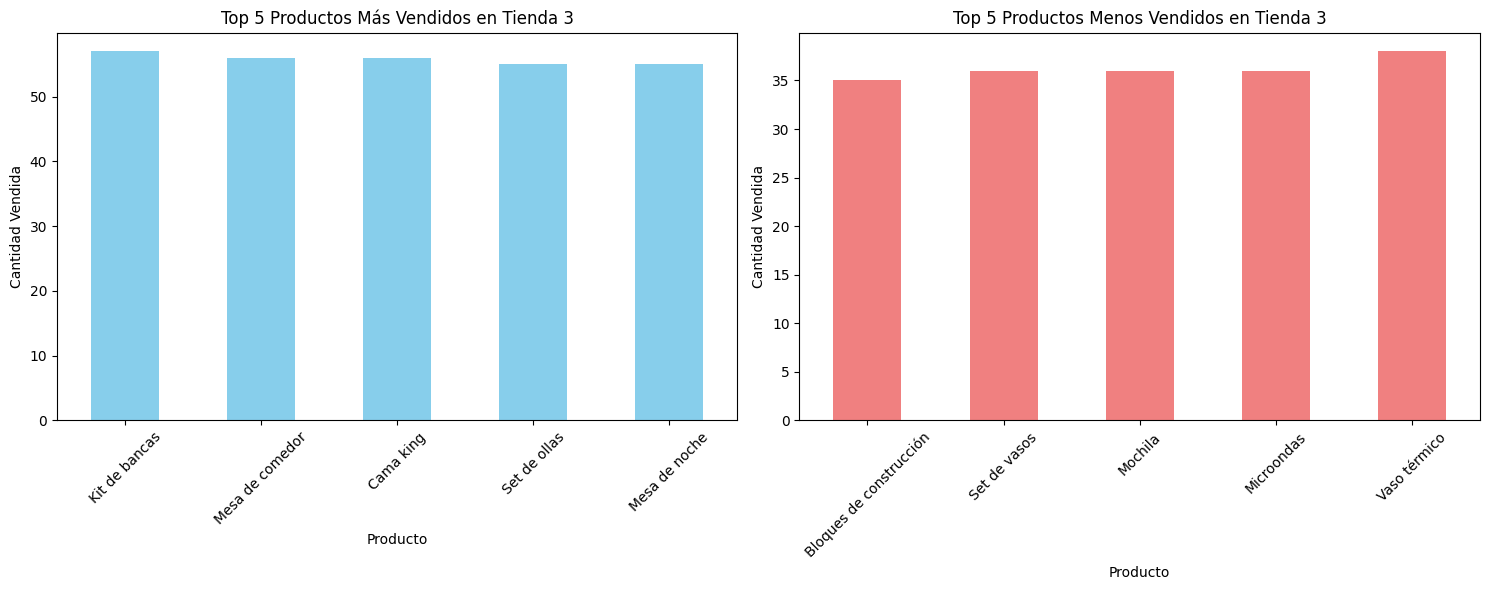

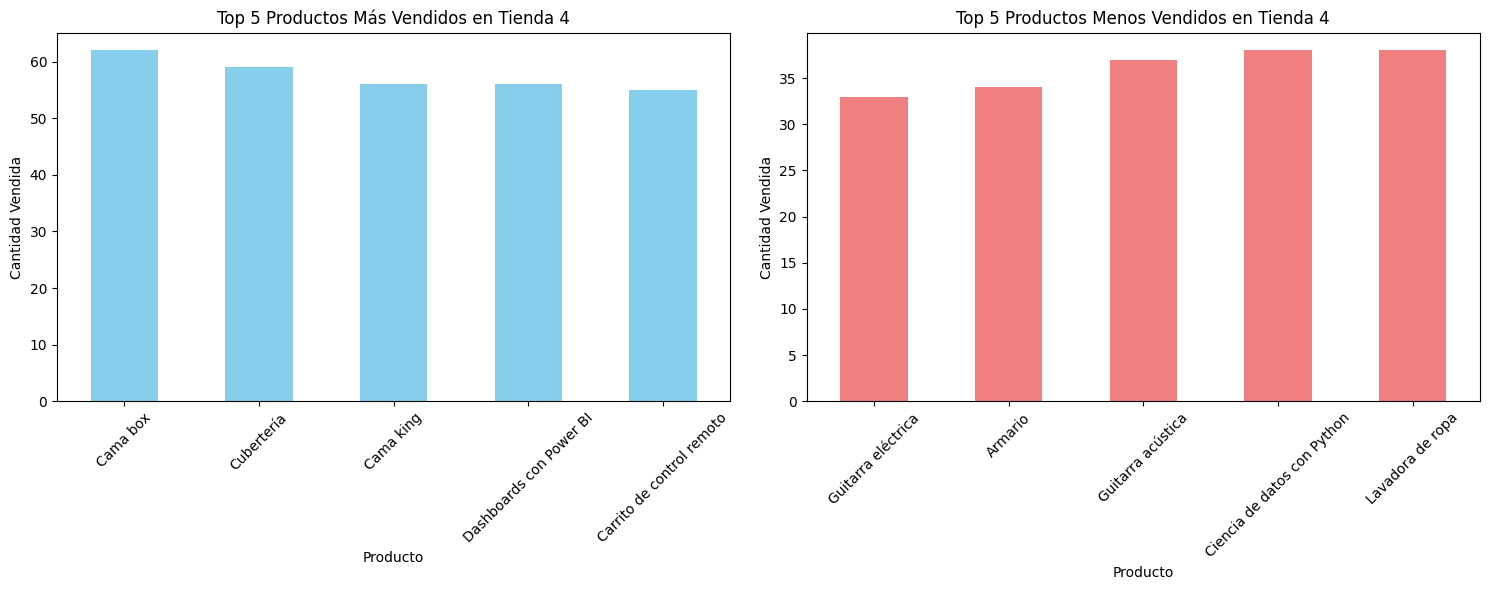

In [41]:

import matplotlib.pyplot as plt
import pandas as pd

tiendas = {'Tienda 1': tienda1, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}

for nombre_tienda, tienda in tiendas.items():
    # Calcular ventas por producto
    ventas_por_producto = tienda.groupby('Producto').size()

    # Productos más vendidos
    productos_mas_vendidos = ventas_por_producto.sort_values(ascending=False).head(5)

    # Productos menos vendidos
    productos_menos_vendidos = ventas_por_producto.sort_values(ascending=True).head(5)

    # Crear subplots para los más y menos vendidos
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Gráfico de los productos más vendidos
    productos_mas_vendidos.plot(kind='bar', ax=axes[0], color='skyblue')
    axes[0].set_title(f'Top 5 Productos Más Vendidos en {nombre_tienda}')
    axes[0].set_xlabel('Producto')
    axes[0].set_ylabel('Cantidad Vendida')
    axes[0].tick_params(axis='x', rotation=45)

    # Gráfico de los productos menos vendidos
    productos_menos_vendidos.plot(kind='bar', ax=axes[1], color='lightcoral')
    axes[1].set_title(f'Top 5 Productos Menos Vendidos en {nombre_tienda}')
    axes[1].set_xlabel('Producto')
    axes[1].set_ylabel('Cantidad Vendida')
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# 5. Envío promedio por tienda

In [44]:
tiendas = {'Tienda 1': tienda1, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}

for nombre_tienda, tienda in tiendas.items():
    valor_envio_promedio = tienda['Costo de envío'].mean()
    print(f"Valor de envío promedio de {nombre_tienda}: {valor_envio_promedio:,.2f}")

Valor de envío promedio de Tienda 1: 26,018.61
Valor de envío promedio de Tienda 2: 25,216.24
Valor de envío promedio de Tienda 3: 24,805.68
Valor de envío promedio de Tienda 4: 23,459.46


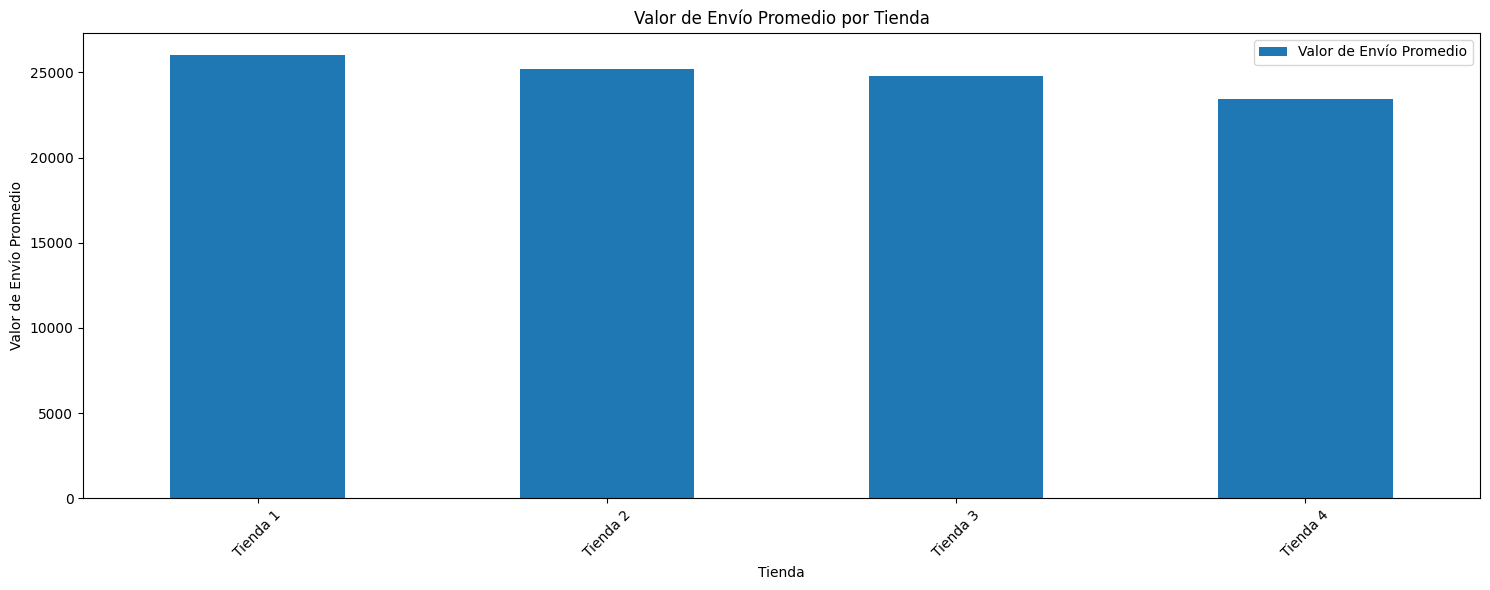

In [45]:
import matplotlib.pyplot as plt
import pandas as pd

tiendas = {'Tienda 1': tienda1, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}

# Diccionario para almacenar el valor de envío promedio de cada tienda
valor_envio_promedio = {}

for nombre_tienda, tienda in tiendas.items():
    valor_envio_promedio[nombre_tienda] = tienda['Costo de envío'].mean()

# Crear un DataFrame a partir del diccionario
df_envio = pd.DataFrame.from_dict(valor_envio_promedio, orient='index', columns=['Valor de Envío Promedio'])

# Crear el gráfico de barras
df_envio.plot(kind='bar', figsize=(15, 6), width=0.5)
plt.title('Valor de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Valor de Envío Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()